##  파산한 은행 데이타집합에서 분기별 은행수를 계산하기


    1. 먼저 데이타 구조를 파악하기

    2. 'Closing Date' 날짜 항목을 datetime 오브젝트로 변기하기

    3. 'Closing Date' 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구하기

    4.  연도별 파산은행 수 구하기

    5. 연도별, 분기별 파산은행 수 구하기

    6. 정보 시각화
    
    
    [도서] Do it 데이타분석을 위한 판다스 입문

In [119]:
import pandas as pd

banks = pd.read_csv('./data/banklist.csv',parse_dates=['Closing Date','Updated Date'])
banks.head()
# (1) 먼저 데이타 구조를 파악하기
# banks.shape
# banks.info()

# (2) Closing Date를 datetime 오브젝트로 변경


# (3) 날짜 정보에서 dt 접근자를 이용하여 연도(year)와 분기(quarter)를 구한다

banks['year'] = banks['Closing Date'].dt.year
banks['quarter'] = banks['Closing Date'].dt.quarter
banks.head()
# (4) 연도별 파산은행 수 구하기
banksm = pd.DataFrame(banks.groupby('year').size())

# (5) 연도별, 분기별 파산은행 수 구하기

banksd = pd.DataFrame(banks.groupby(['year','quarter']).size())
banksd.info()
b = banksd.reset_index()
b['yq'] = b['year'].map(str)+"-"+b['quarter'].map(str)
bb = b.set_index("yq")
bb.drop(['year', 'quarter'], axis='columns', inplace=True)
bb

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 54 entries, (2000, 4) to (2017, 4)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       54 non-null     int64
dtypes: int64(1)
memory usage: 835.0 bytes


,0
yq,
2000-4,2
2001-1,1
2001-2,1
2001-3,2
2002-1,6
2002-2,2
2002-3,1
2002-4,2
2003-1,1


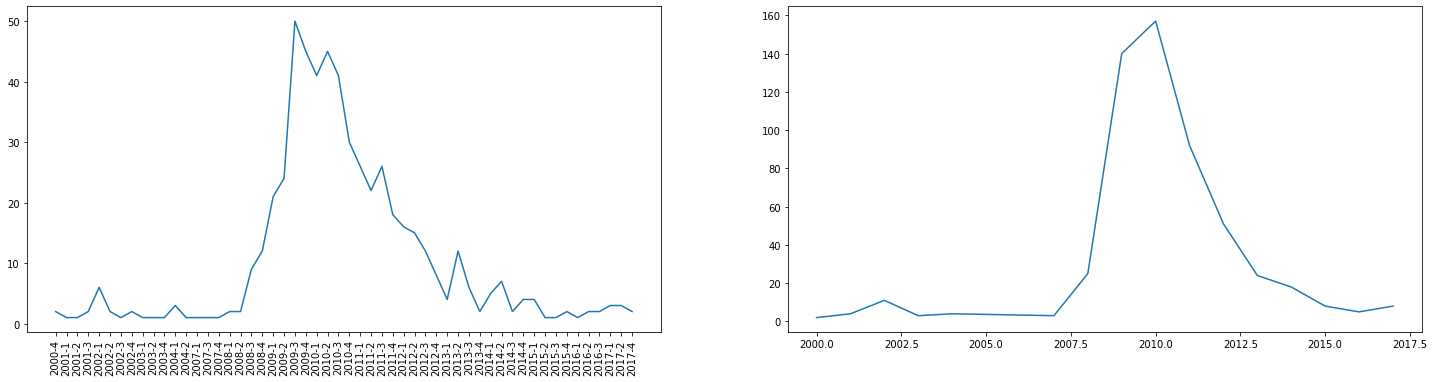

In [130]:
""" 결과를 시각화 ( 간단하게 )"""

import matplotlib.pyplot as plt
# plt.subplots()
# banksm.plot(kind='bar');
# banksd.plot()
fig = plt.figure(figsize=(25,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(banksm)
ax1.plot(bb)
ax1.set_xticklabels(bb.index, rotation=90);